In [ ]:
# mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TIME SERIES FORCASTING PM10

In [ ]:
ready_data = pd.read_csv('https://raw.githubusercontent.com/erlanherlangga1/health-checks/main/ready_data.csv',delimiter=',')
ready_data = ready_data.drop(columns='Unnamed: 0')
ready_data

,tanggal,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
1,2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2,2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
3,2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
4,2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
4379,2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
4380,2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG
4381,2021-12-30,55.0,53.0,16.0,23.00,14.0,71.0,PM25,SEDANG


In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   pm10      4383 non-null   float64
 2   so2       4383 non-null   float64
 3   co        4383 non-null   float64
 4   o3        4383 non-null   float64
 5   no2       4383 non-null   float64
 6   max       4383 non-null   float64
 7   critical  4383 non-null   object 
 8   categori  4383 non-null   object 
dtypes: float64(6), object(3)
memory usage: 308.3+ KB


In [ ]:
ready_data['tanggal']=pd.to_datetime(ready_data['tanggal'])

In [ ]:
ready_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4383 non-null   datetime64[ns]
 1   pm10      4383 non-null   float64       
 2   so2       4383 non-null   float64       
 3   co        4383 non-null   float64       
 4   o3        4383 non-null   float64       
 5   no2       4383 non-null   float64       
 6   max       4383 non-null   float64       
 7   critical  4383 non-null   object        
 8   categori  4383 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 308.3+ KB


In [ ]:
# Set kolom 'Date' sebagai indeks
ready_data.set_index('tanggal', inplace=True)
ready_data


,pm10,so2,co,o3,no2,max,critical,categori
tanggal,,,,,,,,
2010-01-01,60.0,4.0,73.0,27.00,14.0,73.0,CO,SEDANG
2010-01-02,41.0,7.0,30.0,17.00,13.0,41.0,PM10,BAIK
2010-01-03,60.0,5.0,39.0,44.00,19.0,60.0,PM10,SEDANG
2010-01-04,59.0,5.0,46.0,72.75,21.0,59.0,PM10,SEDANG
2010-01-05,60.0,15.5,24.0,28.00,10.0,60.0,PM10,SEDANG
...,...,...,...,...,...,...,...,...
2021-12-27,52.0,61.0,15.0,20.00,15.0,71.0,PM25,SEDANG
2021-12-28,51.0,53.0,15.0,18.00,13.0,65.0,PM25,SEDANG
2021-12-29,31.0,54.0,10.0,24.00,11.0,54.0,SO2,SEDANG


In [ ]:
data_timeseries = ready_data.drop(columns=['max','critical','categori'])
data_timeseries

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,60.0,4.0,73.0,27.00,14.0
2010-01-02,41.0,7.0,30.0,17.00,13.0
2010-01-03,60.0,5.0,39.0,44.00,19.0
2010-01-04,59.0,5.0,46.0,72.75,21.0
2010-01-05,60.0,15.5,24.0,28.00,10.0
...,...,...,...,...,...
2021-12-27,52.0,61.0,15.0,20.00,15.0
2021-12-28,51.0,53.0,15.0,18.00,13.0
2021-12-29,31.0,54.0,10.0,24.00,11.0


In [ ]:
# Resampling data harian menjadi mingguan
weekly_data = data_timeseries.resample('W-Mon').mean()

In [ ]:
weekly_data

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-04,55.000000,5.250000,47.000000,40.187500,16.750000
2010-01-11,51.571429,16.357143,26.714286,43.785714,16.714286
2010-01-18,37.857143,6.571429,30.142857,19.142857,14.000000
2010-01-25,48.285714,4.142857,41.714286,20.571429,15.571429
2010-02-01,47.285714,6.285714,33.142857,25.142857,14.142857
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


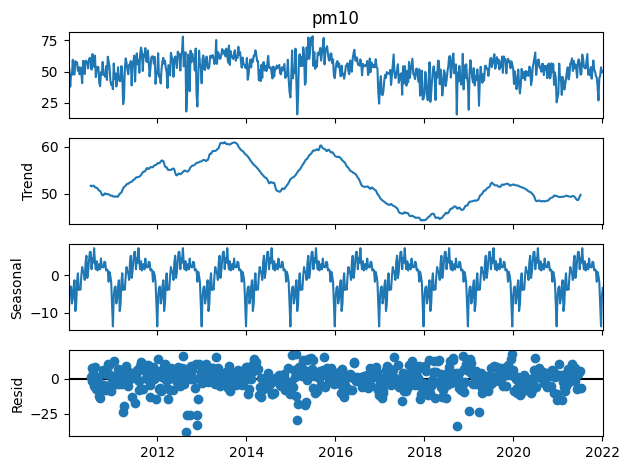

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = weekly_data['pm10']
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# split data training dan testing
train=weekly_data.iloc[:round(len(weekly_data)*0.8)]
test=weekly_data.iloc[round(len(weekly_data)*0.8):]

In [ ]:
train

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-04,55.000000,5.250000,47.000000,40.187500,16.750000
2010-01-11,51.571429,16.357143,26.714286,43.785714,16.714286
2010-01-18,37.857143,6.571429,30.142857,19.142857,14.000000
2010-01-25,48.285714,4.142857,41.714286,20.571429,15.571429
2010-02-01,47.285714,6.285714,33.142857,25.142857,14.142857
...,...,...,...,...,...
2019-07-15,56.371429,23.238095,18.904762,66.428571,15.619048
2019-07-22,60.714286,21.571429,23.428571,58.714286,18.142857
2019-07-29,63.857143,19.285714,21.142857,54.285714,17.571429


In [ ]:
test

,pm10,so2,co,o3,no2
tanggal,,,,,
2019-08-19,61.500000,17.714286,20.285714,64.142857,15.285714
2019-08-26,56.428571,19.142857,21.000000,60.000000,15.285714
2019-09-02,59.571429,17.000000,22.571429,86.714286,13.142857
2019-09-09,51.714286,14.285714,22.857143,71.000000,16.571429
2019-09-16,57.314286,21.714286,18.142857,72.714286,15.285714
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


In [ ]:
print(train.shape)
print(test.shape)

(502, 5)
(125, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax=SARIMAX(train['pm10'],
                      order=(1,0,0),
                      seasonal_order=(2, 1, 0, 52))

#training/melatih model sarimax
result_sarimax=model_sarimax.fit()

result_sarimax.save('sarimax_model.pkl')



In [ ]:
#membuat prediksi dgn model
forecast_step = 125  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values=predictions.predicted_mean
confidence_intervals=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values)
print(confidence_intervals)

2019-08-19    53.024962
2019-08-26    59.682979
2019-09-02    49.011303
2019-09-09    51.904236
2019-09-16    56.407792
                ...    
2021-12-06    53.944695
2021-12-13    38.597800
2021-12-20    35.023387
2021-12-27    25.846205
2022-01-03    49.348393
Freq: W-MON, Name: predicted_mean, Length: 125, dtype: float64
            lower pm10  upper pm10
2019-08-19   33.022891   73.027034
2019-08-26   38.075448   81.290510
2019-09-02   27.147188   70.875418
2019-09-09   29.997571   73.810901
2019-09-16   34.494031   78.321553
...                ...         ...
2021-12-06   28.048093   79.841297
2021-12-13   12.701197   64.494402
2021-12-20    9.126785   60.919989
2021-12-27   -0.050398   51.742807
2022-01-03   23.451791   75.244995

[125 rows x 2 columns]


In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               pm10   No. Observations:                  502
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 52)   Log Likelihood               -1695.122
Date:                            Fri, 15 Dec 2023   AIC                           3398.244
Time:                                    12:39:30   BIC                           3414.681
Sample:                                01-04-2010   HQIC                          3404.723
                                     - 08-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4086      0.041     10.021      0.000       0.329       0.489
ar.S.L52      -0.6354      0.047    -13.580      0.000      -0.727      -0.544
ar.S.L104     -0.2551      0.046     -5.532      0.000      -0.345      -0.165
sigma2       104.1487      5.611     18.563      0.000      93.152     115.145
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                35.85
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.44
Prob(H) (two-sided):                  0.85   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted_val = pd.DataFrame(forecast_values)
predicted_val

,predicted_mean
2019-08-19,53.024962
2019-08-26,59.682979
2019-09-02,49.011303
2019-09-09,51.904236
2019-09-16,56.407792
...,...
2021-12-06,53.944695
2021-12-13,38.597800
2021-12-20,35.023387
2021-12-27,25.846205


In [ ]:
predicted_val.describe()

,predicted_mean
count,125.000000
mean,47.138429
std,7.274740
min,25.846205
25%,42.725462
50%,48.738308
75%,51.731552
max,61.952955


In [ ]:
tess = weekly_data.iloc[round(len(weekly_data)*0.8):]
tess

,pm10,so2,co,o3,no2
tanggal,,,,,
2019-08-19,61.500000,17.714286,20.285714,64.142857,15.285714
2019-08-26,56.428571,19.142857,21.000000,60.000000,15.285714
2019-09-02,59.571429,17.000000,22.571429,86.714286,13.142857
2019-09-09,51.714286,14.285714,22.857143,71.000000,16.571429
2019-09-16,57.314286,21.714286,18.142857,72.714286,15.285714
...,...,...,...,...,...
2021-12-06,44.857143,24.571429,13.714286,19.142857,21.428571
2021-12-13,46.428571,31.000000,9.857143,19.000000,16.571429
2021-12-20,53.428571,40.857143,18.142857,23.142857,13.000000


In [ ]:
predicted_val1 = pd.concat([tess['pm10'], predicted_val],axis=1)
predicted_val1

,pm10,predicted_mean
2019-08-19,61.500000,53.024962
2019-08-26,56.428571,59.682979
2019-09-02,59.571429,49.011303
2019-09-09,51.714286,51.904236
2019-09-16,57.314286,56.407792
...,...,...
2021-12-06,44.857143,53.944695
2021-12-13,46.428571,38.597800
2021-12-20,53.428571,35.023387
2021-12-27,49.285714,25.846205


In [ ]:
from google.colab import files
predicted_val1.to_csv('actual_vs_predicted_pm10.csv', encoding = 'utf-8-sig',index=False)
files.download('actual_vs_predicted_pm10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='tanggal'>

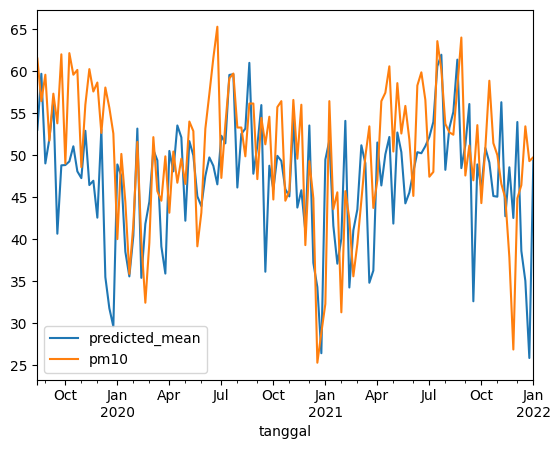

In [ ]:
import matplotlib.pyplot as plt


#plot prediksi vs actual
predicted_val1['predicted_mean'].plot(legend=True)
test['pm10'].plot(legend=True)

##Evaluasi Seasonal Arima

In [ ]:
# Load tools evaluasi
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

rmse_value = mean_absolute_percentage_error(test['pm10'], predicted_val1['predicted_mean'])
# Menampilkan hasil RMSE
print("RMSE:", rmse_value)

RMSE: 0.13700883355051716


## PM10 predicted


In [ ]:
#membuat prediksi dgn model
forecast_step = 281  # jumlah langkah kedepan yg ingin di prediksi
predictions = result_sarimax.get_forecast(steps=forecast_step)

#mendapatkan hasil prediksi
forecast_values_pm10=predictions.predicted_mean
confidence_intervals_pm10=predictions.conf_int()

#menampilkan hasail prediksi
print(forecast_values_pm10)
print(confidence_intervals_pm10)

2019-08-19    53.024962
2019-08-26    59.682979
2019-09-02    49.011303
2019-09-09    51.904236
2019-09-16    56.407792
                ...    
2024-12-02    53.708762
2024-12-09    37.778854
2024-12-16    34.385669
2024-12-23    26.502553
2024-12-30    49.323321
Freq: W-MON, Name: predicted_mean, Length: 281, dtype: float64
            lower pm10  upper pm10
2019-08-19   33.022891   73.027034
2019-08-26   38.075448   81.290510
2019-09-02   27.147188   70.875418
2019-09-09   29.997571   73.810901
2019-09-16   34.494031   78.321553
...                ...         ...
2024-12-02   20.697281   86.720243
2024-12-09    4.767373   70.790335
2024-12-16    1.374188   67.397150
2024-12-23   -6.508928   59.514034
2024-12-30   16.311840   82.334802

[281 rows x 2 columns]


In [ ]:
predicted_val_pm10 = pd.DataFrame(forecast_values_pm10)
predicted_val_pm10

,predicted_mean
2019-08-19,53.024962
2019-08-26,59.682979
2019-09-02,49.011303
2019-09-09,51.904236
2019-09-16,56.407792
...,...
2024-12-02,53.708762
2024-12-09,37.778854
2024-12-16,34.385669
2024-12-23,26.502553


In [ ]:
import datetime
df_pm10 = predicted_val_pm10.loc[datetime.datetime(2022,1,3):]

In [ ]:
df_pm10 = df_pm10.rename(columns={'predicted_mean': 'pm10'})
df_pm10

,pm10
2022-01-03,49.348393
2022-01-10,51.988093
2022-01-17,43.032691
2022-01-24,38.593962
2022-01-31,40.499493
...,...
2024-12-02,53.708762
2024-12-09,37.778854
2024-12-16,34.385669
2024-12-23,26.502553


In [ ]:
from google.colab import files
df_pm10.to_csv('pm10.csv', encoding = 'utf-8-sig')
files.download('pm10.csv')